## Heart Failure Dataset 
Cardiovascular diseases (CVDs) are the **leading cause of death globally**, responsible for approximately **17.9 million deaths annually**—about **31% of all global deaths**. Most of these are caused by heart attacks and strokes, with a third occurring in individuals under 70.

Early detection is critical, especially for individuals at high cardiovascular risk (e.g., those with **hypertension, diabetes, or hyperlipidemia**). This dataset is designed to help build machine learning models to **predict heart disease** based on key health indicators.

---

### Features

The dataset contains **11 input features** and **1 target** (`HeartDisease`):

| Feature          | Description                                                  |
| ---------------- | ------------------------------------------------------------ |
| `Age`            | Age of the patient (years)                                   |
| `Sex`            | Sex of the patient (`M`: Male, `F`: Female)                  |
| `ChestPainType`  | Chest pain type (`TA`, `ATA`, `NAP`, `ASY`)                  |
| `RestingBP`      | Resting blood pressure (mm Hg)                               |
| `Cholesterol`    | Serum cholesterol (mg/dl)                                    |
| `FastingBS`      | Fasting blood sugar (`1` if >120 mg/dl, else `0`)            |
| `RestingECG`     | Resting ECG results (`Normal`, `ST`, `LVH`)                  |
| `MaxHR`          | Maximum heart rate achieved                                  |
| `ExerciseAngina` | Exercise-induced angina (`Y`, `N`)                           |
| `Oldpeak`        | ST depression induced by exercise                            |
| `ST_Slope`       | Slope of the peak exercise ST segment (`Up`, `Flat`, `Down`) |
| `HeartDisease`   | Target: `1` = heart disease, `0` = no disease                |

---


All datasets are publicly available from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/).

---

### Citation

**Source:** [Kaggle - Heart Failure Prediction](https://www.kaggle.com/fedesoriano/heart-failure-prediction)
**Creator:** fedesoriano (September 2021)

---

#### Acknowledgements

**Institutions & Contributors:**

* Hungarian Institute of Cardiology, Budapest: *Andras Janosi, M.D.*
* University Hospital, Zurich: *William Steinbrunn, M.D.*
* University Hospital, Basel: *Matthias Pfisterer, M.D.*
* V.A. Medical Center, Long Beach & Cleveland Clinic Foundation: *Robert Detrano, M.D., Ph.D.*
* **Donor:** David W. Aha ([aha@ics.uci.edu](mailto:aha@ics.uci.edu))



**Importing Dependencies**

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Data Collection and Pre-Processing

In [3]:
df = pd.read_csv('C:/Users/USER/Desktop/Datasets/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.shape

(918, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


**Outlier Removal**

In [6]:
# columns to check for outliers
cols_to_check = ["Oldpeak", "MaxHR", "Cholesterol", "Age", "RestingBP"]

# calculate mean and standard deviation
mean = df[cols_to_check].mean()
std = df[cols_to_check].std()

# calculate Z-scores manually
z_scores = (df[cols_to_check] - mean) / std

# keep rows where all Z-scores are between -3 and 3
mask = (np.abs(z_scores) < 3).all(axis=1)
df_cleaned = df[mask]

# Check before and after shapes
print(f"Original shape: {df.shape}")
print(f"Shape after outlier removal: {df_cleaned.shape}")

Original shape: (918, 12)
Shape after outlier removal: (899, 12)


**Feature Encoding**

In [7]:
df_encoded = pd.get_dummies(
    df_cleaned,
    columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'],
    drop_first=True,
    dtype='int'
)

df_encoded.head()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


**Seperate Features and Target**

In [8]:
X = df_encoded.drop(['HeartDisease'], axis=1)
y = df_encoded['HeartDisease']

In [9]:
print(X)

     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  Sex_M  \
0     40        140          289          0    172      0.0      1   
1     49        160          180          0    156      1.0      0   
2     37        130          283          0     98      0.0      1   
3     48        138          214          0    108      1.5      0   
4     54        150          195          0    122      0.0      1   
..   ...        ...          ...        ...    ...      ...    ...   
913   45        110          264          0    132      1.2      1   
914   68        144          193          1    141      3.4      1   
915   57        130          131          0    115      1.2      1   
916   57        130          236          0    174      0.0      0   
917   38        138          175          0    173      0.0      1   

     ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0                    1                  0                 0   
1                    0           

In [10]:
print(y)

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 899, dtype: int64


**Scaling**

In [11]:

# Columns to scale
cols_to_scale = ['MaxHR', 'Cholesterol', 'RestingBP', 'Oldpeak', 'Age']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform only the selected columns
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])


In [12]:
print(X)

          Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  Sex_M  \
0   -1.428154   0.465900     0.849636          0  1.384320 -0.855469      1   
1   -0.475855   1.634714    -0.168122          0  0.752973  0.137516      0   
2   -1.745588  -0.118507     0.793612          0 -1.535661 -0.855469      1   
3   -0.581666   0.349019     0.149344          0 -1.141069  0.634008      0   
4    0.053200   1.050307    -0.028064          0 -0.588640 -0.855469      1   
..        ...        ...          ...        ...       ...       ...    ...   
913 -0.899099  -1.287320     0.616205          0 -0.194048  0.336112      1   
914  1.534554   0.699663    -0.046738          1  0.161085  2.520678      1   
915  0.370633  -0.118507    -0.625646          0 -0.864854  0.336112      1   
916  0.370633  -0.118507     0.354763          0  1.463238 -0.855469      0   
917 -1.639776   0.349019    -0.214808          0  1.423779 -0.855469      1   

     ChestPainType_ATA  ChestPainType_NAP  ChestPai

**Seperate Training and Test data**

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=13)
print(X.shape, X_train.shape, X_test.shape)

(899, 15) (764, 15) (135, 15)


### Model Selection

In [14]:
model_params = {
    'svm': {
        'model': SVC(),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(),
        'params': {
            'C': [1,5,10]
        }
    }
}


scores = []

# GridsearchCV
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False, verbose=1, scoring='accuracy', n_jobs=-1)
    clf.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits


,model,best_score,best_params
0,svm,0.828597,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.817486,{'n_estimators': 5}
2,logistic_regression,0.830838,{'C': 1}


In [15]:
best_model = df.loc[df['best_score'].idxmax()]
print("Best Model:\n", best_model)


Best Model:
 model          logistic_regression
best_score                0.830838
best_params               {'C': 1}
Name: 2, dtype: object


#### Principal Component Analysis

In [16]:
# apply PCA  and retain 95% variance
pca = PCA(n_components=0.95) 
X_pca = pca.fit_transform(X_train)

print(f"Original number of features: {X_train.shape[1]}")
print(f"Reduced number of features after PCA: {X_pca.shape[1]}")

Original number of features: 15
Reduced number of features after PCA: 11


**GridsearchCV after PCA**

In [17]:
model_params = {
    'svm': {
        'model': SVC(),
        'params': {
            'C': [1, 10, 20],
            'kernel': ['rbf', 'linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [1, 5, 10]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [1, 5, 10]
        }
    }
}

# train models on PCA-transformed data
pca_scores = []
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
    clf.fit(X_pca, y_train)
    
    pca_scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df_pca = pd.DataFrame(pca_scores, columns=['model', 'best_score', 'best_params'])

print("\nModel performance after applying PCA:")
print(df_pca)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits

Model performance after applying PCA:
                 model  best_score                    best_params
0                  svm    0.867836  {'C': 10, 'kernel': 'linear'}
1        random_forest    0.829893           {'n_estimators': 10}
2  logistic_regression    0.862590                       {'C': 1}


**Rebuild and Fit the Best Model**

In [18]:
# best parameters from GridSearchCV
best_svm = SVC(C=10, kernel='linear')

# fit the model using the same PCA-transformed X
best_svm.fit(X_pca, y_train)

SVC(C=10, kernel='linear')

### Model Evaluation

In [19]:
# tranform the test data with PCA
X_test_pca = pca.transform(X_test)

# prediction on test data 
y_pred = best_svm.predict(X_test_pca)

# accuracy score on test data
accuracy_test_data = accuracy_score(y_test, y_pred)

print('Accuracy score on test data: ', accuracy_test_data)

Accuracy score on test data:  0.837037037037037


Text(58.222222222222214, 0.5, 'Truth')

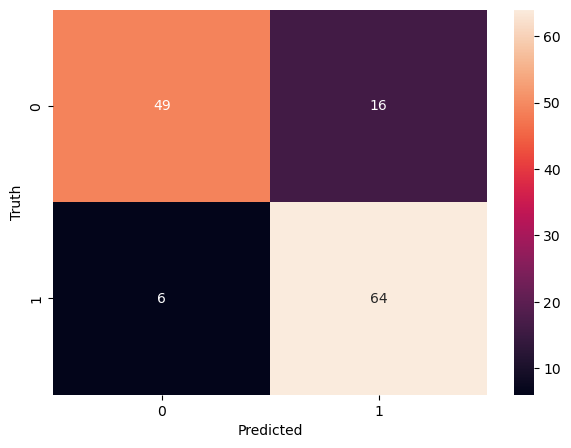

In [20]:
# confusion matrix and visualization
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [21]:
# classification report 
print('Classification Report: \n', classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.75      0.82        65
           1       0.80      0.91      0.85        70

    accuracy                           0.84       135
   macro avg       0.85      0.83      0.83       135
weighted avg       0.84      0.84      0.84       135



**Saving the model**

In [22]:
import pickle

with open('heart_failure_pred_model.pkl', 'wb') as f:
    pickle.dump(best_svm, f)